In [ ]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords  # for removing the stop words from the reviews
from sklearn.feature_extraction.text import TfidfTransformer # for transformation and nlp pipeline
from sklearn.feature_extraction.text import CountVectorizer  #convert the words into count vector
from sklearn.model_selection import train_test_split # spliting the dataset
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/yelp_dataset.csv')

In [ ]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2.0,5.0,0.0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0.0,0.0,0.0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0.0,1.0,0.0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1.0,2.0,0.0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4664 entries, 0 to 4663
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   business_id  4664 non-null   object 
 1   date         4664 non-null   object 
 2   review_id    4664 non-null   object 
 3   stars        4664 non-null   int64  
 4   text         4664 non-null   object 
 5   type         4664 non-null   object 
 6   user_id      4664 non-null   object 
 7   cool         4663 non-null   float64
 8   useful       4663 non-null   float64
 9   funny        4663 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 364.5+ KB


In [ ]:
df.describe()

,stars,cool,useful,funny
count,4664.000000,4663.000000,4663.000000,4663.000000
mean,3.788165,0.913789,1.426764,0.758310
std,1.210320,2.019284,2.284314,2.021793
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,28.000000,28.000000,39.000000


In [ ]:
df.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           1
useful         1
funny          1
dtype: int64

In [ ]:
df['cool'].fillna(0.0,inplace=True)

In [ ]:
df['useful'].fillna(0.0,inplace=True)

In [ ]:
df['funny'].fillna(0.0,inplace=True)

In [ ]:
df.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

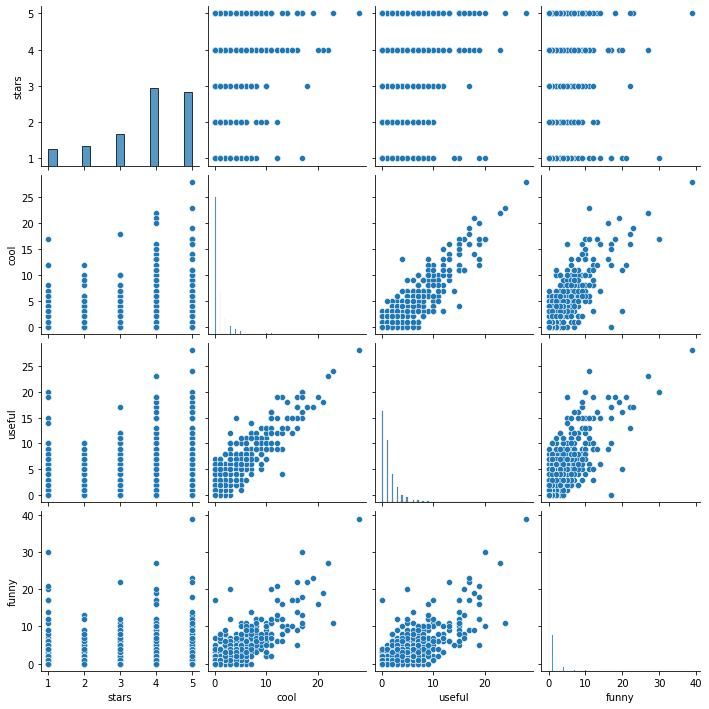

In [ ]:
sns.pairplot(df)

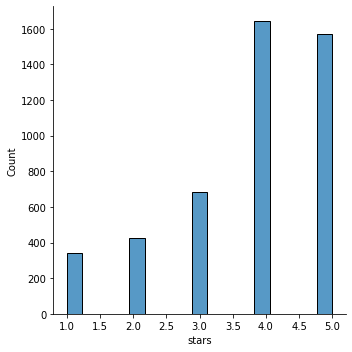

In [ ]:
sns.displot(df['stars'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


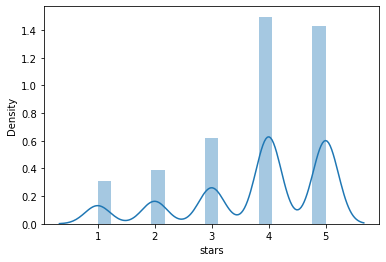

In [ ]:
sns.distplot(df['stars'])

# Maximum 4 rating is given by the people

In [ ]:
df.stars.value_counts()

4    1643
5    1572
3     681
2     425
1     343
Name: stars, dtype: int64

1643 peoples gave 4 rating out of 4664 peoples

#NLP model

In [ ]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2.0,5.0,0.0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0.0,0.0,0.0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0.0,1.0,0.0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1.0,2.0,0.0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0.0,0.0,0.0


In [ ]:
X,y = df['text'],df['stars']

In [ ]:
count_vector = CountVectorizer()

Converrting the text into the vector form for further processing

In [ ]:
X = count_vector.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [ ]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
X_pred = model.predict(X_test)
print(classification_report(y_test,X_pred))

              precision    recall  f1-score   support

           1       0.57      0.08      0.14       101
           2       0.26      0.04      0.07       122
           3       0.32      0.06      0.10       201
           4       0.42      0.75      0.54       525
           5       0.57      0.51      0.54       451

    accuracy                           0.46      1400
   macro avg       0.43      0.29      0.28      1400
weighted avg       0.45      0.46      0.41      1400



Increasing the accuracy y preprocessing the test data like removing punctuations stop word, and tokenize the word

In [ ]:
text = df['text']

In [ ]:
text.head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
2    love the gyro plate. Rice is so good and I als...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
Name: text, dtype: object

removing punctuations

In [ ]:
import string
string.punctuation # library having all kind of punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuations(data):
  new_text = "".join([i for i in data if i not in string.punctuation])
  return new_text

In [ ]:
df['clean_text'] = df['text'].apply(lambda x:remove_punctuations(x))

In [ ]:
df['clean_text'].head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
2    love the gyro plate Rice is so good and I also...
3    Rosie Dakota and I LOVE Chaparral Dog Park Its...
4    General Manager Scott Petello is a good egg No...
Name: clean_text, dtype: object

changing the case to lower only

In [ ]:
df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())

In [ ]:
df['clean_text'].head()

0    my wife took me here on my birthday for breakf...
1    i have no idea why some people give bad review...
2    love the gyro plate rice is so good and i also...
3    rosie dakota and i love chaparral dog park its...
4    general manager scott petello is a good egg no...
Name: clean_text, dtype: object

stopword removing

In [ ]:
import nltk 
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

tokenizing the dataframe

In [ ]:
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens



In [ ]:
df['token_text']= df['clean_text'].apply(lambda x: tokenization(x))

In [ ]:
def removing_stopwords(data):
  new_text = [i for i in data if i not in stopwords]
  return new_text

In [ ]:
df['token_text'][0]

['my wife took me here on my birthday for breakfast and it was excellent  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure  our waitress was excellent and our food arrived quickly on the semibusy saturday morning  it looked like the place fills up pretty quickly so the earlier you get here the better\r\n\r\ndo yourself a favor and get their bloody mary  it was phenomenal and simply the best ive ever had  im pretty sure they only use ingredients from their garden and blend them fresh when you order it  it was amazing\r\n\r\nwhile everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete  it was the best toast ive ever had\r\n\r\nanyway i cant wait to go back']

In [ ]:
df['token_text'] = df['token_text'].apply(lambda x:removing_stopwords(x))

lemmatizing

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
word_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def lemmatizer(text):
  lemm_text = [word_lemmatizer.lemmatize(word) for word in text]
  return lemm_text


In [ ]:
df['lemmatized_word']=df['token_text'].apply(lambda x:lemmatizer(x))


In [ ]:
df['lemmatized_word'].head()

0    [my wife took me here on my birthday for break...
1    [i have no idea why some people give bad revie...
2    [love the gyro plate rice is so good and i als...
3    [rosie dakota and i love chaparral dog park it...
4    [general manager scott petello is a good egg n...
Name: lemmatized_word, dtype: object

In [ ]:
def converting_to_string(data):
  new_text = "".join([i for i in data])
  return new_text

In [ ]:
df['lemmatized_word'] = df['lemmatized_word'].apply(lambda x:converting_to_string(x))

In [ ]:
df['lemmatized_word'].head()

0    my wife took me here on my birthday for breakf...
1    i have no idea why some people give bad review...
2    love the gyro plate rice is so good and i also...
3    rosie dakota and i love chaparral dog park its...
4    general manager scott petello is a good egg no...
Name: lemmatized_word, dtype: object

In [ ]:
X_data = df['lemmatized_word']

In [ ]:
X_data[:5], y_train[:5]


(0    my wife took me here on my birthday for breakf...
 1    i have no idea why some people give bad review...
 2    love the gyro plate rice is so good and i also...
 3    rosie dakota and i love chaparral dog park its...
 4    general manager scott petello is a good egg no...
 Name: lemmatized_word, dtype: object, 3480    5
 420     5
 3001    4
 6       5
 932     3
 Name: stars, dtype: int64)

In [ ]:
X_data = count_vector.fit_transform(X_data)

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_data, y,test_size=0.3,random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(X_Train,Y_Train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
X_pred = model.predict(X_Test)
print(classification_report(Y_Test,X_pred))

              precision    recall  f1-score   support

           1       0.67      0.04      0.07       101
           2       0.17      0.02      0.03       122
           3       0.28      0.04      0.08       201
           4       0.42      0.76      0.54       525
           5       0.56      0.50      0.53       451

    accuracy                           0.46      1400
   macro avg       0.42      0.27      0.25      1400
weighted avg       0.44      0.46      0.39      1400



In [ ]:
model2 = LinearRegression()
model2.fit(X_Train,Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_pred2 = model2.predict(X_Test)


In [ ]:
print(model2.intercept_)
print(model2.coef_)

4.7140661393280245
[ 0.09448688  0.          0.         ...  0.         -0.004453
  0.        ]


In [ ]:
import statsmodels.formula.api as smf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model2.score(X_Test, X_pred2)))

Variance score: 1.0


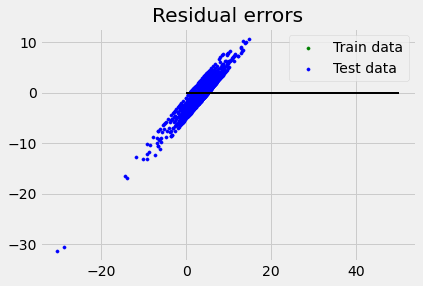

In [ ]:
# plot for residual error
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(model2.predict(X_Train), model2.predict(X_Train) - Y_Train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(model2.predict(X_Test), model2.predict(X_Test) - Y_Test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_Test, X_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_Test, X_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_Test, X_pred2)))

Mean Absolute Error: 2.3221123002682607
Mean Squared Error: 11.227853994306571
Root Mean Squared Error: 3.3507990083421255


You can see that the value of root mean squared error is 3.3507990083421255, which is less than of the mean value of the percentages. This means that our algorithm is very accurate and can still make reasonably good predictions.

multiclass classifier prediction model

In [ ]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,clean_text,token_text,lemmatized_word
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2.0,5.0,0.0,my wife took me here on my birthday for breakf...,[my wife took me here on my birthday for break...,my wife took me here on my birthday for breakf...
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0.0,0.0,0.0,i have no idea why some people give bad review...,[i have no idea why some people give bad revie...,i have no idea why some people give bad review...
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0.0,1.0,0.0,love the gyro plate rice is so good and i also...,[love the gyro plate rice is so good and i als...,love the gyro plate rice is so good and i also...
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1.0,2.0,0.0,rosie dakota and i love chaparral dog park its...,[rosie dakota and i love chaparral dog park it...,rosie dakota and i love chaparral dog park its...
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0.0,0.0,0.0,general manager scott petello is a good egg no...,[general manager scott petello is a good egg n...,general manager scott petello is a good egg no...


In [ ]:
#new_df.type.unique() # since there is no other unique type rather than review we can drop this too

In [ ]:
new_df = df.drop(['clean_text','text', 'token_text','review_id','user_id','date','business_id','type'], axis = 1)

In [ ]:
new_df.head()

,stars,cool,useful,funny,lemmatized_word
0,5,2.0,5.0,0.0,my wife took me here on my birthday for breakf...
1,5,0.0,0.0,0.0,i have no idea why some people give bad review...
2,4,0.0,1.0,0.0,love the gyro plate rice is so good and i also...
3,5,1.0,2.0,0.0,rosie dakota and i love chaparral dog park its...
4,5,0.0,0.0,0.0,general manager scott petello is a good egg no...


In [ ]:
X_data_new = new_df['lemmatized_word']
y_data_new = new_df.drop('lemmatized_word', axis=1)

In [ ]:
print(X_data_new.head(),'\n\n\n', y_data_new.head())

0    my wife took me here on my birthday for breakf...
1    i have no idea why some people give bad review...
2    love the gyro plate rice is so good and i also...
3    rosie dakota and i love chaparral dog park its...
4    general manager scott petello is a good egg no...
Name: lemmatized_word, dtype: object 


    stars  cool  useful  funny
0      5   2.0     5.0    0.0
1      5   0.0     0.0    0.0
2      4   0.0     1.0    0.0
3      5   1.0     2.0    0.0
4      5   0.0     0.0    0.0


predicting rating ie star prediction

In [ ]:
X_data_new = count_vector.fit_transform(X_data_new)
X_train, X_test, y_train, y_test = train_test_split(X_data_new, y_data_new['stars'],test_size=0.3,random_state=42)


In [ ]:
X_train[:5]

<5x24023 sparse matrix of type '<class 'numpy.int64'>'
	with 371 stored elements in Compressed Sparse Row format>

In [ ]:
y_train[:5]

3480    5
420     5
3001    4
6       5
932     3
Name: stars, dtype: int64

In [ ]:
# X_train_tfidf.shape, y_train.shape

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear')  
classifier.fit(X_train, y_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_pred_2= classifier.predict(X_test)  


In [ ]:
len(X_pred_2), len(y_test)

(1400, 1400)

In [ ]:
print(classification_report(X_pred_2,y_test))

              precision    recall  f1-score   support

           1       0.39      0.34      0.36       116
           2       0.31      0.27      0.29       140
           3       0.27      0.26      0.27       205
           4       0.45      0.49      0.47       473
           5       0.54      0.53      0.53       466

    accuracy                           0.44      1400
   macro avg       0.39      0.38      0.38      1400
weighted avg       0.43      0.44      0.43      1400



In [ ]:
rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [ ]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
acc_ = accuracy_score(y_test, X_pred_2)
f1_ = f1_score(y_test, X_pred_2, average='weighted')
print('Accuracy (linear Kernel): ', "%.2f" % (acc_*100))
print('F1 (linear Kernel): ', "%.2f" % (f1_*100))

Accuracy (linear Kernel):  43.57
F1 (linear Kernel):  43.74


In [ ]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  35.36
F1 (Polynomial Kernel):  26.40


In [ ]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  32.21
F1 (RBF Kernel):  15.70


predicting coolness in rating

In [ ]:
X_train_cool, X_test_cool, y_train_cool, y_test_cool = train_test_split(X_data_new, y_data_new['cool'],test_size=0.3,random_state=42)


In [ ]:
cool_classifier = classifier.fit(X_train_cool, y_train_cool)  # linearclassifier 

In [ ]:
X_pred_cool = cool_classifier.predict(X_test_cool)  

In [ ]:
acc_ = accuracy_score(y_test_cool, X_pred_cool)
f1_ = f1_score(y_test_cool, X_pred_cool, average='weighted')
print('Accuracy (linear Kernel) for coolness : ', "%.2f" % (acc_*100))
print('F1 (linear Kernel) for coolness : ', "%.2f" % (f1_*100))

Accuracy (linear Kernel) for coolness :  52.64
F1 (linear Kernel) for coolness :  49.06


In [ ]:
rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train_cool, y_train_cool) 
poly = SVC(kernel='poly', degree=3, C=1).fit(X_train_cool, y_train_cool) 

In [ ]:
poly_pred = poly.predict(X_test_cool)
rbf_pred = rbf.predict(X_test_cool)

In [ ]:
poly_accuracy = accuracy_score(y_test_cool, poly_pred)
poly_f1 = f1_score(y_test_cool, poly_pred, average='weighted')
print(' coolness Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('coolness F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

 coolness Accuracy (Polynomial Kernel):  59.79
coolness F1 (Polynomial Kernel):  47.15


In [ ]:
rbf_accuracy = accuracy_score(y_test_cool, rbf_pred)
rbf_f1 = f1_score(y_test_cool, rbf_pred, average='weighted')
print('coolness Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('coolness F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

coolness Accuracy (RBF Kernel):  61.14
coolness F1 (RBF Kernel):  46.40
